In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, potential

Load pre-calculated data from file: ```galaxy_population_data_2.hdf5``` for faster execution.

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    halflight_radius_U = f['halflight_radius_U'][:]
    halflight_radius_V = f['halflight_radius_V'][:]
    halflight_radius_I = f['halflight_radius_I'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]

Now apply the selection criteria for star-forming, young quiescent (post-starburst), intermediate, and old quiescent galaxies at $z=2$.

In [3]:
import warnings
warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-10.5)

# Potential vs Radius

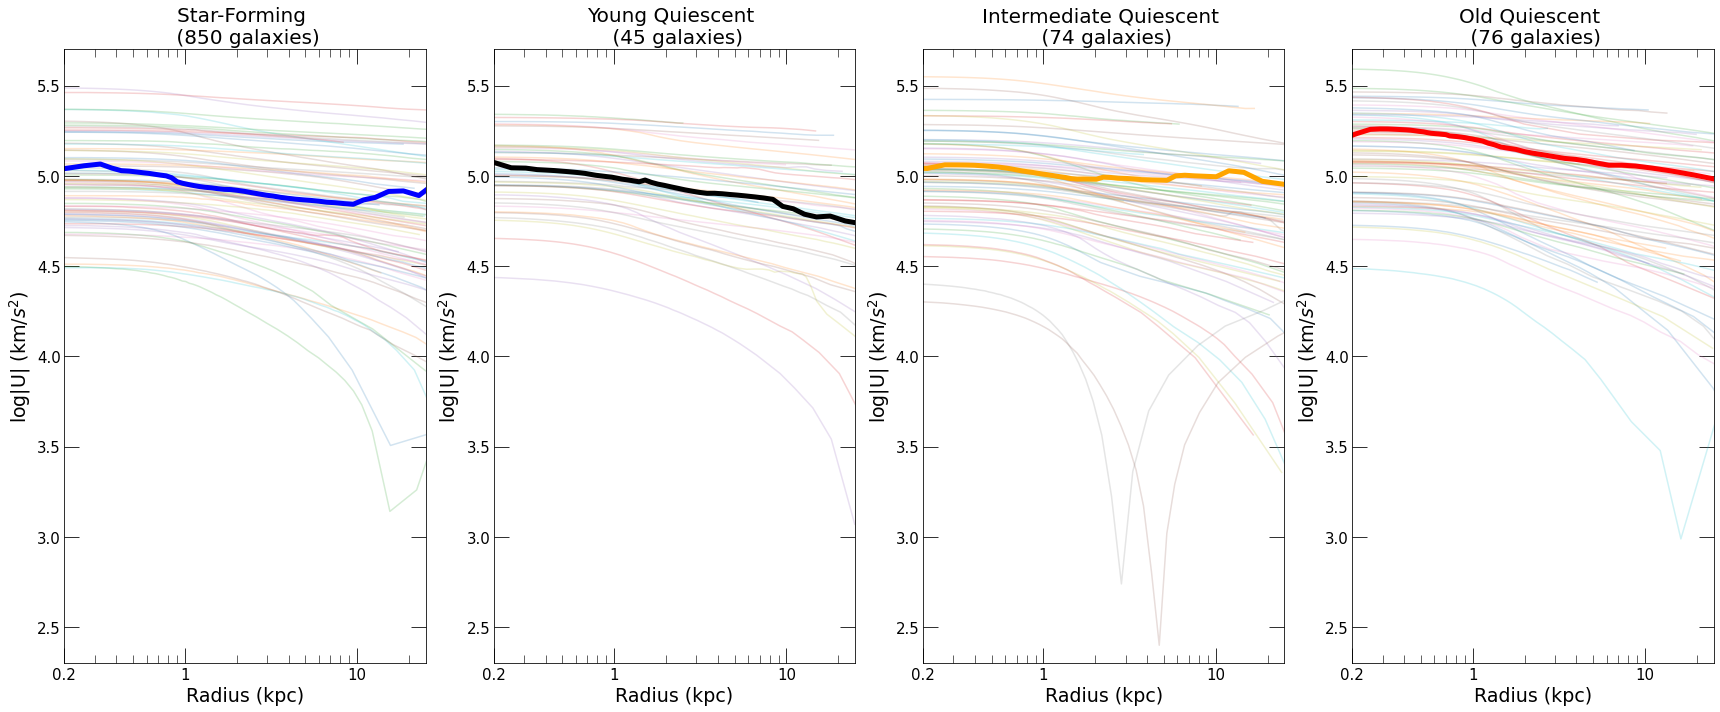

In [5]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins = 50
redshift = 2
ymin = 2.3
ymax = 5.7

#z=2 star-forming galaxies
distance = np.zeros(0)
big_grav = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 80, replace=False):
    yy, xx, R, grav = potential(id=id, redshift=redshift, n_bins=n_bins)
    big_grav = np.concatenate((big_grav, grav), axis = None)
    ax1.plot(xx, yy, alpha = 0.2)
    distance = np.concatenate((distance, R), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_grav, 'median', bins=radial_percentiles)
ax1.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=20) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('log|U| (km/$s^2$)', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
distance = np.zeros(0)
big_grav = np.zeros(0)
for id in ids[PSB_selection]:
    yy, xx, R, grav = potential(id=id, redshift=redshift, n_bins=n_bins)
    big_grav = np.concatenate((big_grav, grav), axis = None)
    ax2.plot(xx, yy, alpha = 0.2)
    distance = np.concatenate((distance, R), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_grav, 'median', bins=radial_percentiles)
ax2.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='black', linewidth=5)
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=20) #
ax2.set_xlim(0.2, 25)
ax2.set_ylim(ymin, ymax)
ax2.set_xlabel("Radius (kpc)", fontsize=19)
ax2.set_ylabel('log|U| (km/$s^2$)', fontsize=19)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
distance = np.zeros(0)
big_grav = np.zeros(0)
for id in ids[intermediate_quiescent_selection]:
    yy, xx, R, grav = potential(id=id, redshift=redshift, n_bins=n_bins)
    big_grav = np.concatenate((big_grav, grav), axis = None)
    ax3.plot(xx, yy, alpha = 0.2)
    distance = np.concatenate((distance, R), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_grav, 'median', bins=radial_percentiles)
ax3.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='orange', linewidth=5)
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=20) #
ax3.set_xlim(0.2, 25)
ax3.set_ylim(ymin, ymax)
ax3.set_xlabel("Radius (kpc)", fontsize=19)
ax3.set_ylabel('log|U| (km/$s^2$)', fontsize=19)
ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax3.set_xticks([0.2, 1, 10], minor=False)
ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
distance = np.zeros(0)
big_grav = np.zeros(0)
for id in ids[old_quiescent_selection]:
    yy, xx, R, grav = potential(id=id, redshift=redshift, n_bins=n_bins)
    big_grav = np.concatenate((big_grav, grav), axis = None)
    ax4.plot(xx, yy, alpha = 0.2)
    distance = np.concatenate((distance, R), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i)
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_grav, 'median', bins=radial_percentiles)
ax4.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='red', linewidth=5)
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=20)
ax4.set_xlim(0.2, 25)
ax4.set_ylim(ymin, ymax)
ax4.set_xlabel("Radius (kpc)", fontsize=19)
ax4.set_ylabel('log|U| (km/$s^2$)', fontsize=19)
ax4.set_xscale('log')
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax4.set_xticks([0.2, 1, 10], minor=False)
ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

# [Z]

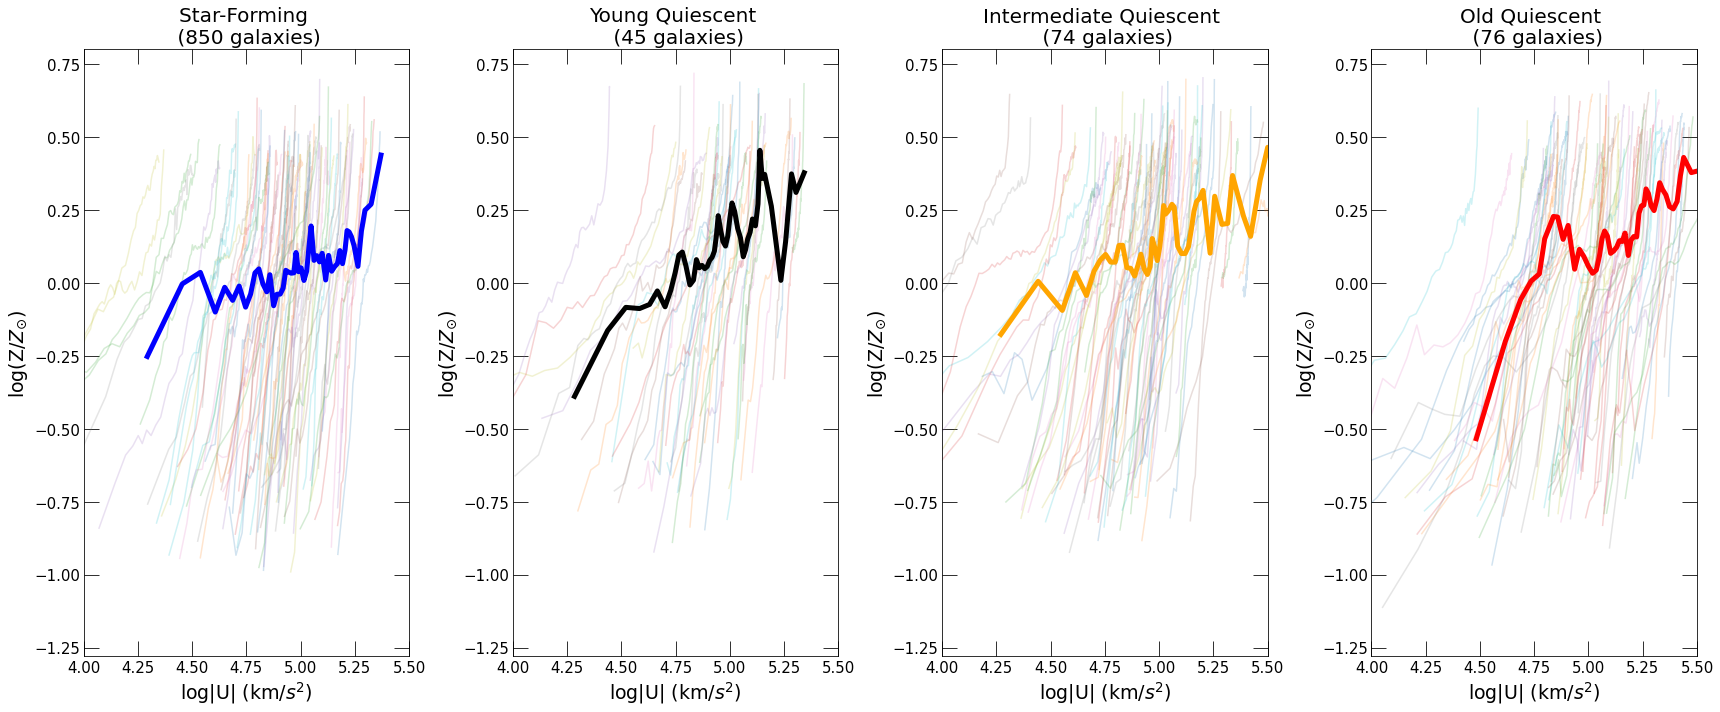

In [4]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins = 50
redshift = 2
xmin = 4.0
xmax = 5.5
ymin = -1.28
ymax = 0.80

#z=2 star-forming galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 80, replace=False):
    yy, xx, grav, metallicity = metallicity_profile(id=id, redshift=redshift, n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, metallicity[1:-2]), axis = None)
    ax1.plot(xx[1:-2], np.log10(yy[1:-2]), alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax1.plot(np.array(percentiles[1:]), np.log10(np.array(statistic)), c='blue', linewidth=5)
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=n_bins)
# ax1.plot(np.array((bin_edges[1:]+bin_edges[:-1])/2), np.log10(np.array(statistic)), c='blue', linewidth=5)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=20) #
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax1.set_ylabel('log(Z/$Z_{\odot}$)', fontsize=19)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[PSB_selection]:
    yy, xx, grav, metallicity = metallicity_profile(id=id, redshift=redshift, n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, metallicity[1:-2]), axis = None)
    ax2.plot(xx[1:-2], np.log10(yy[1:-2]), alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax2.plot(np.array(percentiles[1:]), np.log10(np.array(statistic)), c='black', linewidth=5)
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=n_bins)
# ax2.plot(np.array((bin_edges[1:]+bin_edges[:-1])/2), np.log10(np.array(statistic)), c='black', linewidth=5)
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=20) 
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax2.set_ylabel('log(Z/$Z_{\odot}$)', fontsize=19)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax2.set_xticks([0.2, 1, 10], minor=False)
#ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[intermediate_quiescent_selection]:
    yy, xx, grav, metallicity = metallicity_profile(id=id, redshift=redshift, n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, metallicity[1:-2]), axis = None)
    ax3.plot(xx[1:-2], np.log10(yy[1:-2]), alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax3.plot(np.array(percentiles[1:]), np.log10(np.array(statistic)), c='orange', linewidth=5)
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=20) #
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax3.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax3.set_ylabel('log(Z/$Z_{\odot}$)', fontsize=19)
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax3.set_xticks([0.2, 1, 10], minor=False)
#ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[old_quiescent_selection]:
    yy, xx, grav, metallicity = metallicity_profile(id=id, redshift=redshift, n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, metallicity[1:-2]), axis = None)
    ax4.plot(xx[1:-2], np.log10(yy[1:-2]), alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax4.plot(np.array(percentiles[1:]), np.log10(np.array(statistic)), c='red', linewidth=5)
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=20)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax4.set_ylabel('log(Z/$Z_{\odot}$)', fontsize=19)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()


# [Fe/H]

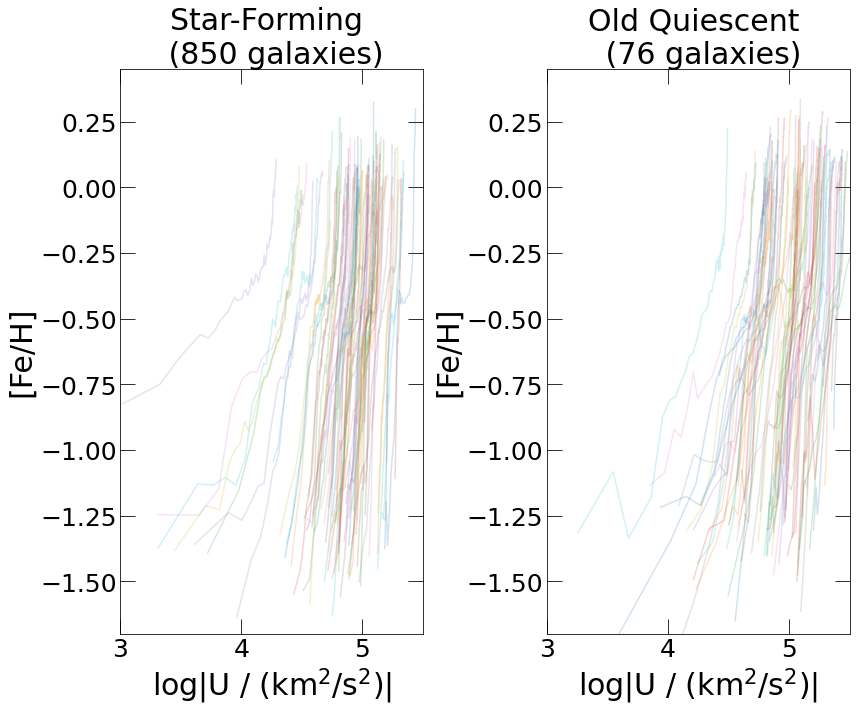

In [4]:
#metallicity profiles
f, (ax1, ax4) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
f.set_facecolor('w')
n_bins = 50
redshift = 2
xmin = 3.0
xmax = 5.5
ymin = -1.7
ymax = 0.45

fts = 30
ftss = 25

#z=2 star-forming galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 80, replace=False):
    yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
    ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# ax1.plot(np.array(percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
ax1.set_ylabel('[Fe/H]', fontsize=fts)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

# #z=2 young quiescent galaxies
# potential = np.zeros(0)
# big_metallicity = np.zeros(0)
# for id in ids[PSB_selection]:
#     yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
#     big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
#     ax2.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
#     potential = np.concatenate((potential, grav[1:-2]), axis = None)
# percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
# for i in range(1, (n_bins+1)):
#     percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# # statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# # ax2.plot(np.array(percentiles[1:]), np.array(statistic), c='black', linewidth=5)
# # statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=n_bins)
# # ax2.plot(np.array((bin_edges[1:]+bin_edges[:-1])/2), np.log10(np.array(statistic)), c='black', linewidth=5)
# ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=fts) 
# ax2.set_xlim(xmin, xmax)
# ax2.set_ylim(ymin, ymax)
# ax2.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
# ax2.set_ylabel('[Fe/H]', fontsize=fts)
# ax2.tick_params(which='major', length=15)
# ax2.tick_params(which='minor', length=8)
# ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# #ax2.set_xticks([0.2, 1, 10], minor=False)
# #ax2.set_xticklabels(['0.2', '1', '10'])

# #z=2 intermediate quiescent galaxies
# potential = np.zeros(0)
# big_metallicity = np.zeros(0)
# for id in ids[intermediate_quiescent_selection]:
#     yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
#     big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
#     ax3.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
#     potential = np.concatenate((potential, grav[1:-2]), axis = None)
# percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
# for i in range(1, (n_bins+1)):
#     percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# # statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# # ax3.plot(np.array(percentiles[1:]), np.array(statistic), c='orange', linewidth=5)
# ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=fts) #
# ax3.set_xlim(xmin, xmax)
# ax3.set_ylim(ymin, ymax)
# ax3.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
# ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.tick_params(which='major', length=15)
# ax3.tick_params(which='minor', length=8)
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# #ax3.set_xticks([0.2, 1, 10], minor=False)
# #ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[old_quiescent_selection]:
    yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
    ax4.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# ax4.plot(np.array(percentiles[1:]), np.array(statistic), c='red', linewidth=5)
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=fts)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
ax4.set_ylabel('[Fe/H]', fontsize=fts)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

plt.savefig('REU\potential.png', dpi=400)

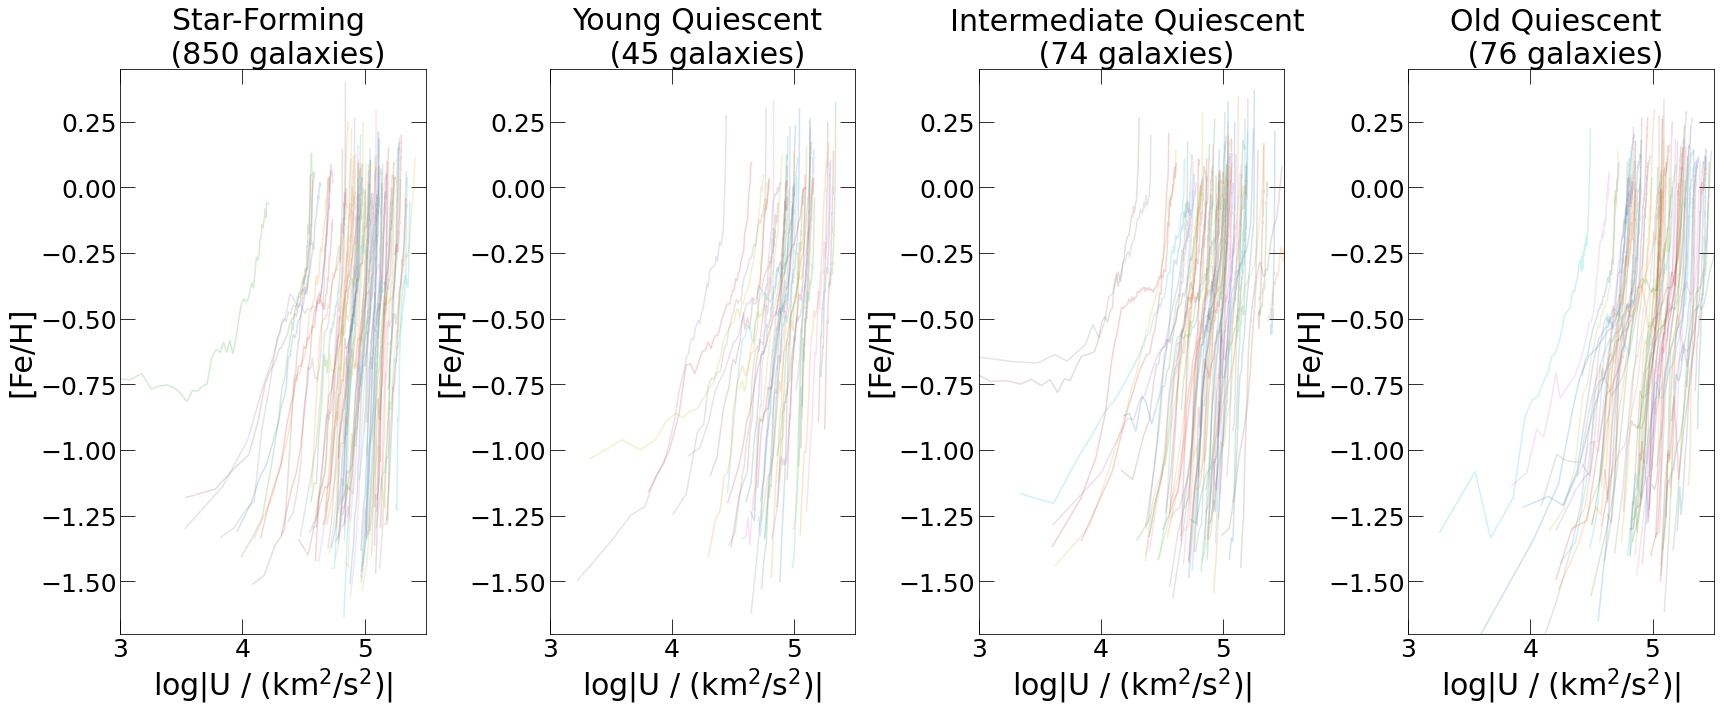

In [4]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins = 50
redshift = 2
xmin = 3.0
xmax = 5.5
ymin = -1.7
ymax = 0.45

fts = 30
ftss = 25

#z=2 star-forming galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 80, replace=False):
    yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
    ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# ax1.plot(np.array(percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
ax1.set_ylabel('[Fe/H]', fontsize=fts)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[PSB_selection]:
    yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
    ax2.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# ax2.plot(np.array(percentiles[1:]), np.array(statistic), c='black', linewidth=5)
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=n_bins)
# ax2.plot(np.array((bin_edges[1:]+bin_edges[:-1])/2), np.log10(np.array(statistic)), c='black', linewidth=5)
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=fts) 
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
ax2.set_ylabel('[Fe/H]', fontsize=fts)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
#ax2.set_xticks([0.2, 1, 10], minor=False)
#ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[intermediate_quiescent_selection]:
    yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
    ax3.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# ax3.plot(np.array(percentiles[1:]), np.array(statistic), c='orange', linewidth=5)
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax3.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
#ax3.set_xticks([0.2, 1, 10], minor=False)
#ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[old_quiescent_selection]:
    yy, logFeH, xx, grav = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logFeH[1:-2]), axis = None)
    ax4.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
# ax4.plot(np.array(percentiles[1:]), np.array(statistic), c='red', linewidth=5)
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=fts)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log|U / (km$^2$/s$^2$)|', fontsize=fts)
ax4.set_ylabel('[Fe/H]', fontsize=fts)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

plt.savefig('FIGURES\potential.png', dpi=400)

# [Mg/Fe]

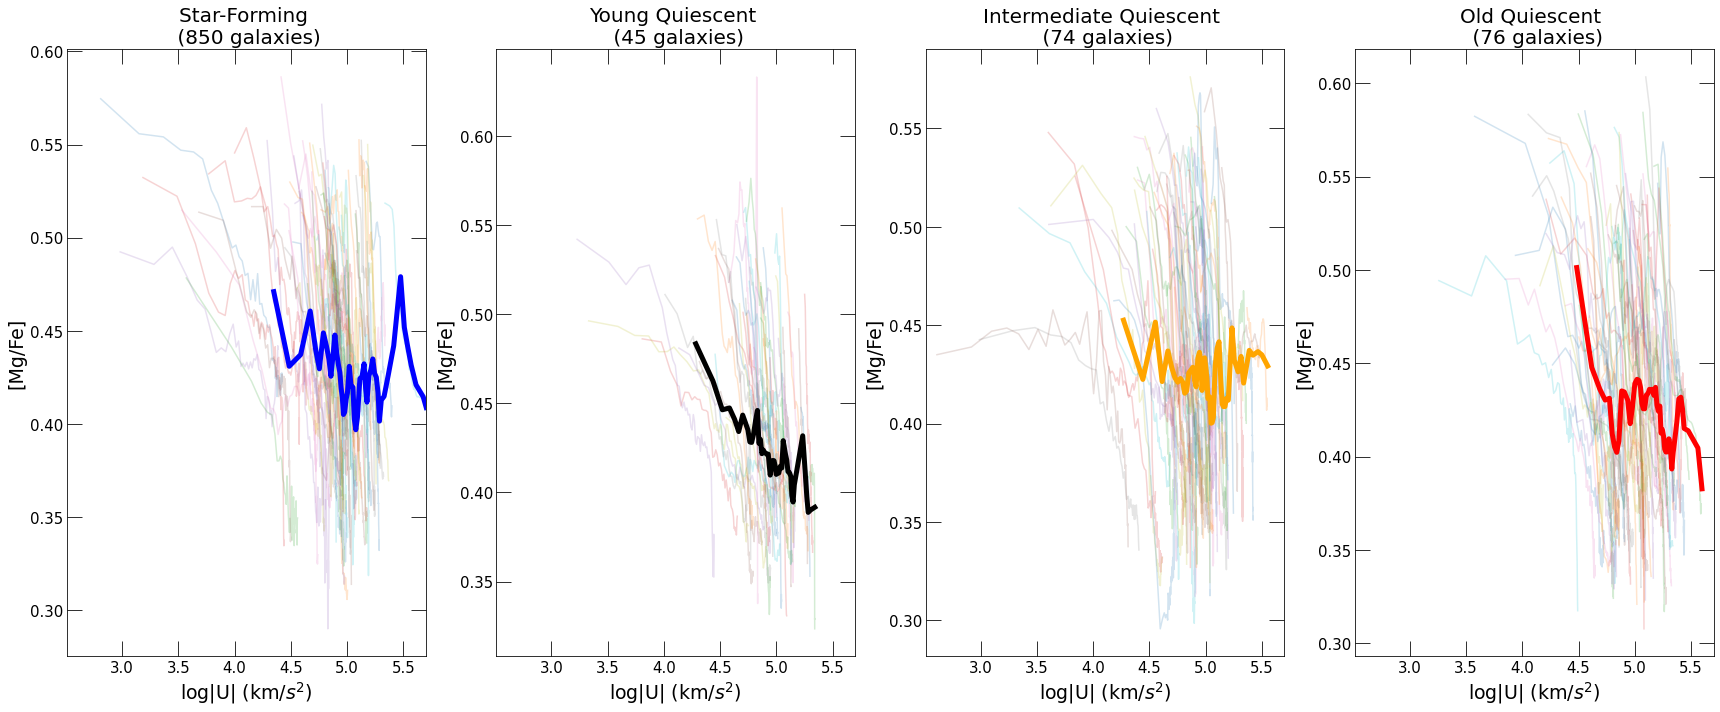

In [8]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins = 50
redshift = 2
xmin = 2.51
xmax = 5.7
ymin = 0.29
ymax = 0.64

#z=2 star-forming galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 80, replace=False):
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax1.plot(np.array(percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=20) #
ax1.set_xlim(xmin, xmax)
#ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax1.set_ylabel('[Mg/Fe]', fontsize=19)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[PSB_selection]:
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax2.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax2.plot(np.array(percentiles[1:]), np.array(statistic), c='black', linewidth=5)
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=n_bins)
# ax2.plot(np.array((bin_edges[1:]+bin_edges[:-1])/2), np.log10(np.array(statistic)), c='black', linewidth=5)
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=20) 
ax2.set_xlim(xmin, xmax)
#ax2.set_ylim(ymin, ymax)
ax2.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax2.set_ylabel('[Mg/Fe]', fontsize=19)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax2.set_xticks([0.2, 1, 10], minor=False)
#ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[intermediate_quiescent_selection]:
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax3.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax3.plot(np.array(percentiles[1:]), np.array(statistic), c='orange', linewidth=5)
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=20) #
ax3.set_xlim(xmin, xmax)
#ax3.set_ylim(ymin, ymax)
ax3.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax3.set_ylabel('[Mg/Fe]', fontsize=19)
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax3.set_xticks([0.2, 1, 10], minor=False)
#ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[old_quiescent_selection]:
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax4.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax4.plot(np.array(percentiles[1:]), np.array(statistic), c='red', linewidth=5)
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=20)
ax4.set_xlim(xmin, xmax)
#ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax4.set_ylabel('[Mg/Fe]', fontsize=19)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()


# [Mg/H]

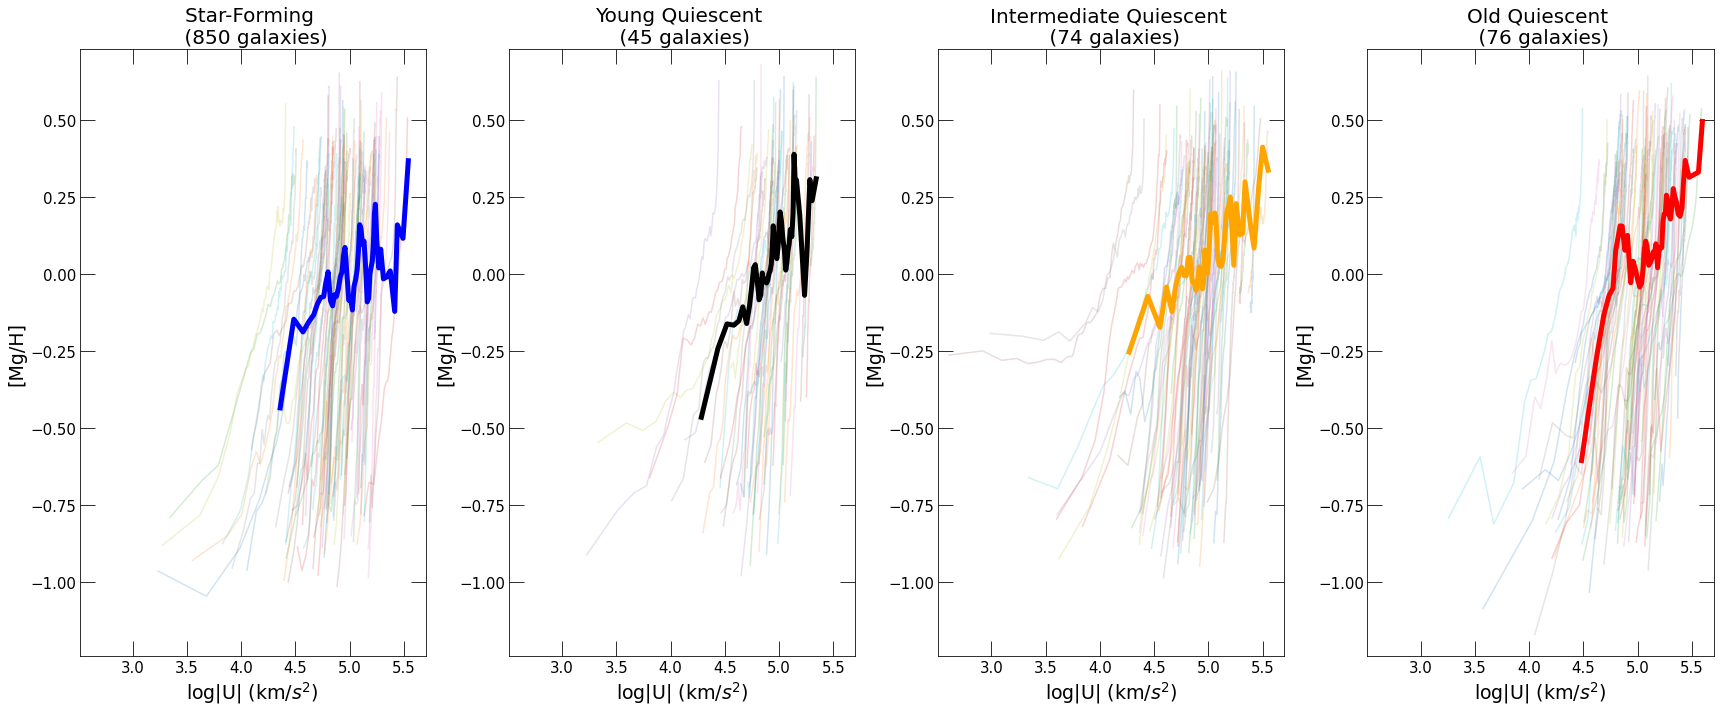

In [9]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins = 50
redshift = 2
xmin = 2.51
xmax = 5.7
ymin = -1.24
ymax = 0.73

#z=2 star-forming galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 80, replace=False):
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax1.plot(np.array(percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=20) #
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax1.set_ylabel('[Mg/H]', fontsize=19)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[PSB_selection]:
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax2.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax2.plot(np.array(percentiles[1:]), np.array(statistic), c='black', linewidth=5)
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=n_bins)
# ax2.plot(np.array((bin_edges[1:]+bin_edges[:-1])/2), np.log10(np.array(statistic)), c='black', linewidth=5)
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=20) 
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax2.set_ylabel('[Mg/H]', fontsize=19)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax2.set_xticks([0.2, 1, 10], minor=False)
#ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[intermediate_quiescent_selection]:
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax3.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax3.plot(np.array(percentiles[1:]), np.array(statistic), c='orange', linewidth=5)
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=20) #
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax3.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax3.set_ylabel('[Mg/H]', fontsize=19)
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax3.set_xticks([0.2, 1, 10], minor=False)
#ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
potential = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids[old_quiescent_selection]:
    yy, logratio, xx, grav = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', n_bins=n_bins, axis='potential')
    big_metallicity = np.concatenate((big_metallicity, logratio[1:-2]), axis = None)
    ax4.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
    potential = np.concatenate((potential, grav[1:-2]), axis = None)
percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    percentiles[i] = np.percentile(potential, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(potential, big_metallicity, 'median', bins=percentiles)
ax4.plot(np.array(percentiles[1:]), np.array(statistic), c='red', linewidth=5)
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=20)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log|U| (km/$s^2$)', fontsize=19)
ax4.set_ylabel('[Mg/H]', fontsize=19)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()
